# 1-2 국가별 음주 데이터 분석

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# -*- coding UTF-8 -*-
file_path = "/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/drinks.csv"

drinks = pd.read_csv(file_path)
print(drinks.info())
print(drinks.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None
             country  beer_servings  spirit_servings  wine_servings  \
0        Afghanistan              0                0              0   
1            Albania             89              132             54   
2            Algeria             25                0             14   
3            Andorra            245              138            312   
4 

## 인사이트의 발견: 탐색과 시각화하기

[두 피처 간의 상관계수 구하기]

In [3]:
# 두 피처 간의 상관 계수 구하기
corr = drinks[["beer_servings", "total_litres_of_pure_alcohol"]].corr(method = "pearson")
corr

,beer_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.835839
total_litres_of_pure_alcohol,0.835839,1.000000


[여러 피처의 상관관계 분석하기]

In [4]:
# 전체 피처 간의 상관 계수 구하기
cols = ["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]
corr = drinks[cols].corr(method = "pearson")
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


[corr 행렬 히트맵으로 시각화하기]

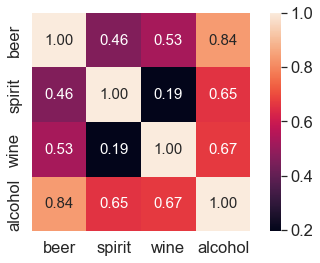

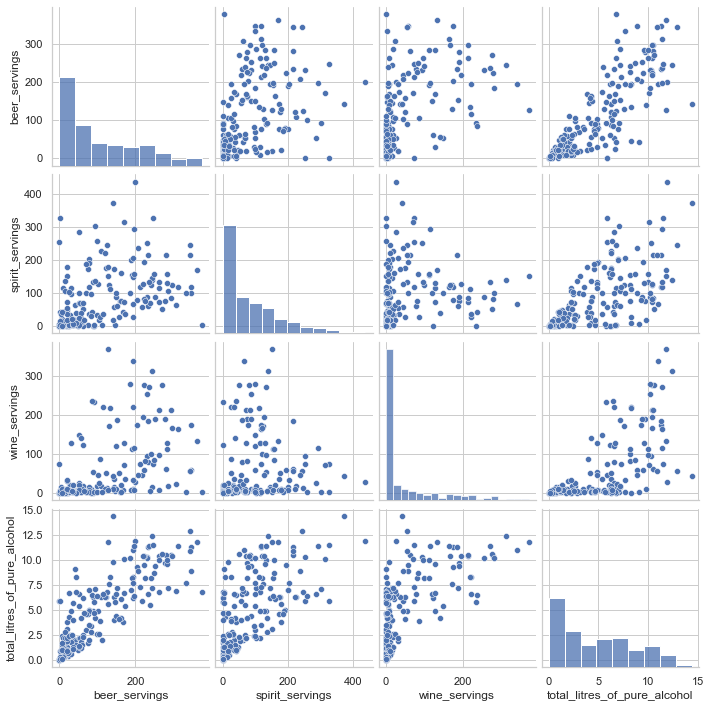

In [5]:
# corr 행렬 히트맵을 시각화(heapmap)
cols_views = ["beer", "spirit", "wine", "alcohol"]
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = ".2f",
                annot_kws = {"size": 15},
                yticklabels = cols_views,
                xticklabels = cols_views)

plt.tight_layout()
plt.show()

# 시각화 라이브러리를 이용한 피처 간의 산점도 그래프 출력(pairplot)
sns.set(style = "whitegrid", context = "notebook")
sns.pairplot(drinks[["beer_servings", "spirit_servings",
                     "wine_servings", "total_litres_of_pure_alcohol"]], height = 2.5)
plt.show()

## 탐색적 분석: 스무고개로 개념적 탐색 분석하기

[결측 데이터 전처리하기]

In [6]:
# 결측 데이터 전처리(continent 결측값)
drinks["continent"] = drinks["continent"].fillna("OT")
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


[파이차트로 시각화하기]

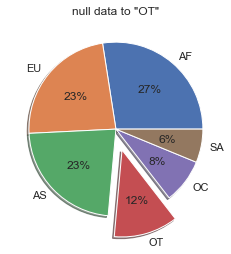

In [7]:
# 파이차트로 시각화
labels = drinks["continent"].value_counts().index.tolist()
fracs1 = drinks["continent"].value_counts().values.tolist()
explode = [0, 0, 0, 0.25, 0, 0]

plt.pie(fracs1, labels = labels, explode = explode, autopct = "%.0f%%", shadow = True)
plt.title("null data to \"OT\"")
plt.show()

[대륙별 spirit_servings의 통계적 정보(mean, min, max, sum)는 어느 정도일까]

In [8]:
# 대륙별 spirit_servings의 통계적 정보(mean, min, max, sum)는 어느 정도일까
result = drinks.groupby("continent")["spirit_servings"].agg(["mean", "min", 'max', "sum"])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


[전체 평균보다 많은 알코올을 섭취하는 대륙]

In [9]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙
continent_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

[평균 beer_servings가 가장 높은 대륙]

In [10]:
# 평균 beer_servings가 가장 높은 대륙
beer_continent = drinks.groupby("continent")["beer_servings"].mean().idxmax()
print(beer_continent)

EU


[분석 결과를 시각화하기]

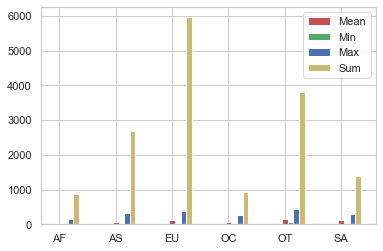

In [11]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화
n_groups = len(result.index)
means = result["mean"]
mins = result["min"]
maxs = result["max"]
sums = result["sum"]

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color = "r", label = "Mean")
rects2 = plt.bar(index + bar_width, mins, bar_width, color = "g", label = "Min")
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color = "b", label = "Max")
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color = "y", label = "Sum")

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

[대륙별 total_litres_of_pure_alcohol을 시각화]

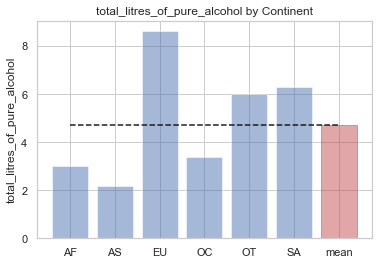

In [12]:
# 대륙별 total_litres_of_pure_alcohol을 시각화
continents = continent_mean.index.tolist()
continents.append("mean")
x_pos = np.arange(len(continents))
alcohol = continent_mean.values.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align = "center", alpha = 0.5)
bar_list[len(continents) - 1].set_color("r")
plt.plot([0, 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel("total_litres_of_pure_alcohol")
plt.title("total_litres_of_pure_alcohol by Continent")

plt.show()

[대륙별 beer_servings를 시각화하기]

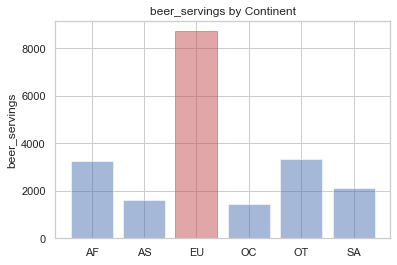

In [13]:
# 대륙별 beer_servings를 시작합니다.
beer_group = drinks.groupby("continent")["beer_servings"].sum()
continents = beer_group.index.tolist()
x_pos = np.arange(len(continents)) # x축 번호
alcohol = beer_group.values.tolist() # y축

bar_list = plt.bar(x_pos, alcohol, align = "center", alpha = 0.5)
plt.xticks(x_pos, continents)
bar_list[continents.index("EU")].set_color("r")

plt.title("beer_servings by Continent")
plt.ylabel("beer_servings")
plt.show()

## 통계적 분석: 분석 대상 간의 통계적 차이 검정하기

[아프리카와 유럽 간의 맥주 소비량 차이 검증하기]

In [14]:
# 아프리카와 유럽 간의 맥주 소비량 차이 검정하기
africa = drinks.loc[drinks["continent"] == "AF"]
europe = drinks.loc[drinks["continent"] == "EU"]

tTestResult = stats.ttest_ind(africa["beer_servings"], europe["beer_servings"], equal_var = False)
tTestResultDiffVar = stats.ttest_ind(africa["beer_servings"], europe["beer_servings"], equal_var = True)
print("The t-statistic and p-value assuming equal variances is %.3f and %.3f" % tTestResult)
print("The t-statistic and p-value assuming not equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.144 and 0.000
The t-statistic and p-value assuming not equal variances is -7.268 and 0.000


[대한민국은 얼마나 술을 독하게 마시는 나라일까?]

In [15]:
# total_servings 피처를 생성
drinks["total_servings"] = drinks["beer_servings"] + drinks["spirit_servings"] + drinks["wine_servings"]

# 술 소비량 대비 알코올 비율 피처를 생성
drinks["alcohol_rate"] = drinks["total_litres_of_pure_alcohol"] / drinks["total_servings"]
drinks["alcohol_rate"] = drinks["alcohol_rate"].fillna(0)

# 순위 정보를 생성
country_with_rank = drinks[["country", "alcohol_rate"]]
country_with_rank = country_with_rank.sort_values(by = "alcohol_rate", ascending = False)
country_with_rank.head()

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


[국가별 순위 정보를 시각화하기]

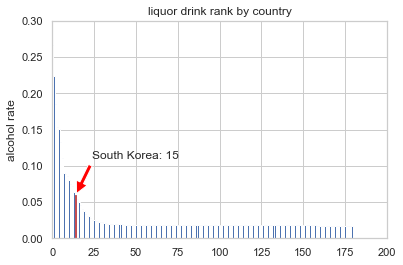

In [16]:
# 국가별 순위 정보를 그래프로 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color("r")
plt.title("liquor drink rank by country")
plt.ylabel("alcohol rate")
plt.axis([0, 200, 0, 0.3])

# 대한민국 술 소비 순위
korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank["country"] == "South Korea"]["alcohol_rate"].values[0]
plt.annotate("South Korea: " + str(korea_rank + 1),
            xy = (korea_rank, korea_alc_rate),
            xytext = (korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops = dict(facecolor = "red", shrink = -0.05))

plt.show()